In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

https://www.kaggle.com/datasets/thedevastator/h-1b-non-immigrant-labour-visa

My intial analysis of this dataset is going to open ended as I did not identify any use case yet. I have mentioned the problem statement after the Exploratory Data Analysis part.

The following are the columns and what they mean:  


    case_year: The year in which the case was submitted. (Integer)  
    case_status: The status of the case, either approved or denied. (String)  
    case_submitted: The date on which the case was submitted. (Date)  
    decision_date: The date on which the decision was made. (Date)  
    emp_name: The name of the employer. (String)  
    emp_city: The city in which the employer is located. (String)  
    emp_state: The state in which the employer is located. (String)  
    emp_zip: The zip code of the employer. (Integer)  
    emp_country: The country in which the employer is located. (String)  
    job_title: The title of the job for which the visa is being applied. (String)  
    soc_code: The Standard Occupational Classification code for the job. (Integer)  
    soc_name: The name of the Standard Occupational Classification for the job. (String)  
    full_time_position: Whether the position is full-time or not. (Boolean)  
    prevailing_wage: The prevailing wage for the job. (Integer)  
    pw_unit: The unit of the prevailing wage. (String)  
    pw_level: The level of the prevailing wage. (String)  
    wage_from: The minimum wage for the job. (Integer)  
    wage_to: The maximum wage for the job. (Integer)  
    wage_unit: The unit of the wage. (String)  
    work_city: The city in which the job is located. (String)  
    work_state: The state in which the job is located. (String)  
    emp_h1b_dependent: Whether the employer is H-1B dependent or not. (Boolean)  
    emp_willful_violator: Whether the employer is a willful violator or not. (Boolean)  
    lat: The latitude of the job location. 
    lng: The longitude of the job location. (Float)  

In [5]:
input_data = pd.read_csv("h1b_data.csv")

C:\Users\mmurugesan3\AppData\Local\Temp\ipykernel_14856\2613493479.py:1: DtypeWarning: Columns (8,12,15,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  input_data = pd.read_csv("h1b_data.csv")


In [6]:
# input_data = input_data.dropna(axis='index')

In [7]:
X = input_data.drop("case_status", axis=1)
y = input_data["case_status"]

In [8]:
# split into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# creating a dataframe of training data for exploratory data analysis and visualization purposes
data=X_train.copy()

In [12]:
data["case_status"] = y_train

In [13]:
data.columns

Index(['emp_state', 'soc_name', 'full_time_position', 'prevailing_wage',
       'wage_from', 'work_state', 'lat', 'lng', 'case_status'],
      dtype='object')

# Data Cleaning

In [11]:
data.dtypes

case_year                 int64
case_submitted           object
decision_date            object
emp_name                 object
emp_city                 object
emp_state                object
emp_zip                  object
emp_country              object
job_title                object
soc_code                 object
soc_name                 object
full_time_position       object
prevailing_wage         float64
pw_unit                  object
pw_level                 object
wage_from               float64
wage_to                 float64
wage_unit                object
work_city                object
work_state               object
emp_h1b_dependent        object
emp_willful_violator     object
lat                     float64
lng                     float64
case_status              object
dtype: object

In [25]:
data['case_year'] = pd.to_datetime(data['case_year'])
data['case_submitted'] = pd.to_datetime(data['case_submitted'])
data['decision_date'] = pd.to_datetime(data['decision_date'])

In [12]:
data.isnull().sum()

case_year                     0
case_submitted                0
decision_date                 0
emp_name                     66
emp_city                     42
emp_state                    82
emp_zip                      69
emp_country             1185186
job_title                    20
soc_code                    113
soc_name                  11495
full_time_position       421587
prevailing_wage             117
pw_unit                     153
pw_level                1642677
wage_from                     7
wage_to                 1207119
wage_unit                    44
work_city                     0
work_state                    0
emp_h1b_dependent       1123170
emp_willful_violator    1123170
lat                           0
lng                           0
case_status                  12
dtype: int64

In [13]:
data['case_status'].unique()

array(['C', 'CW', 'D', 'W', nan], dtype=object)

In [14]:
data['emp_country'].unique()

array([nan, 'USA', 'CANADA', 'CAMBODIA', 'INDIA', 'CHINA', 'AUSTRALIA',
       'AFGHANISTAN'], dtype=object)

In [15]:
data['case_year'].unique()

array([2012, 2013, 2016, 2015, 2017, 2011, 2014], dtype=int64)

In [16]:
data['full_time_position'].unique()

array(['Y', nan, 'N'], dtype=object)

In [45]:
data['soc_name'].unique()

array(['COMPUTER PROGRAMMERS', nan,
       'COMPUTER AND INFORMATION RESEARCH SCIENTISTS', ...,
       'NATURAL SCIENCES MANAGERS, R&D (ACWIA ONLY)',
       'WEIGHERS, MEASURERS, CHECKERS, AND SAMPLERS,',
       'ADVERTISING AND PROMORTIONS MANAGERS'], dtype=object)

In [60]:
data['pw_level'].unique()

array([nan, 'Level I', 'Level II', 'Level III', 'Level IV'], dtype=object)

In [69]:
data['pw_unit'].unique()

array(['Y', 'H', 'BW', 'M', 'W', nan], dtype=object)

In [70]:
data['wage_unit'].unique()

array(['Y', 'H', 'BW', 'M', 'W', nan], dtype=object)

### => Acceptance rate each year

In [ ]:
# remove nan value from case_status

In [17]:
# Replace "C" as 1 and all others as 0 in the case_status column
data['case_status'][data['case_status']!='C'] = 0
data['case_status'][data['case_status']=='C'] = 1

C:\Users\mmurugesan3\AppData\Local\Temp\ipykernel_14816\1886027090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['case_status'][data['case_status']!='C'] = 0
C:\Users\mmurugesan3\AppData\Local\Temp\ipykernel_14816\1886027090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['case_status'][data['case_status']=='C'] = 1


In [18]:
perc = data.groupby('case_year')['case_status'].apply(lambda x: (x.sum()/x.count())*100)
numb = data.groupby('case_year')['case_status'].count()

<AxesSubplot:title={'center':'Percentage of H1-B acceptance each year'}, xlabel='case_year', ylabel='Percentage'>

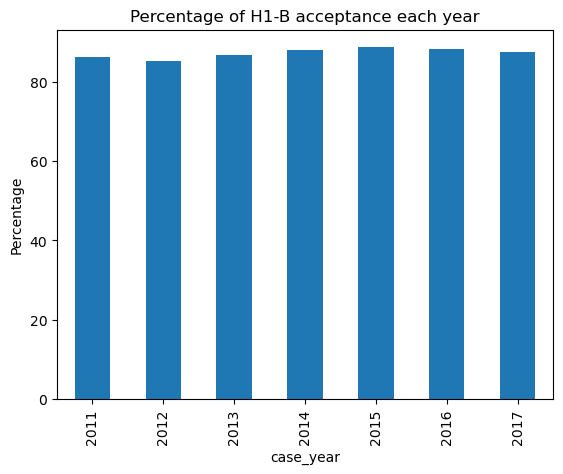

In [19]:
perc.plot(kind = "bar",title="Percentage of H1-B acceptance each year",ylabel='Percentage')

<AxesSubplot:title={'center':'Number of H1-B applicants each year'}, xlabel='case_year', ylabel='Number'>

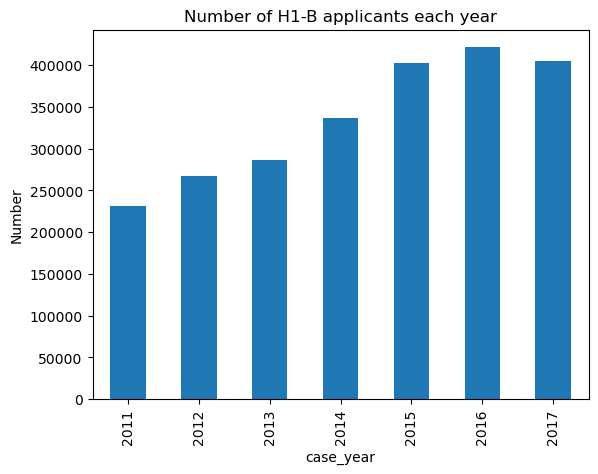

In [20]:
numb.plot.bar(title="Number of H1-B applicants each year",ylabel='Number')

#### One interesting insight from both the plots is that eventhough the number of applicants increase every year, the acceptance rate is almost the same.

### => 

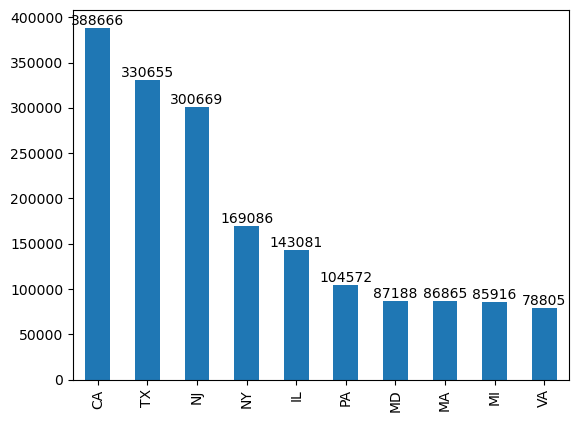

In [47]:
# number of employers applying H1-B from each state from 2011 to 2017 (Top 10)
ax = data['emp_state'].value_counts().head(10).plot.bar()
for container in ax.containers:
    ax.bar_label(container)

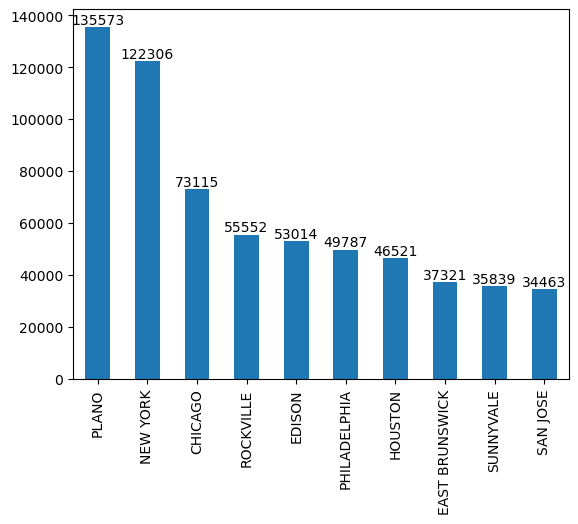

In [66]:
# number of employers applying H1-B from each city from 2011 to 2017 (Top 10)
ax = data['emp_city'].value_counts().head(10).plot.bar()
for container in ax.containers:
    ax.bar_label(container)

Note that here, the top empolyer city does not belong to the top employer state

In [56]:
# no of days taken to process the application
proc_days = pd.DataFrame((data['decision_date'] - data['case_submitted']).dt.days.describe())
proc_days[0] = proc_days[0].astype('int64') 
proc_days

,0
count,2352567
mean,30
std,125
min,0
25%,6
50%,6
75%,6
max,2214


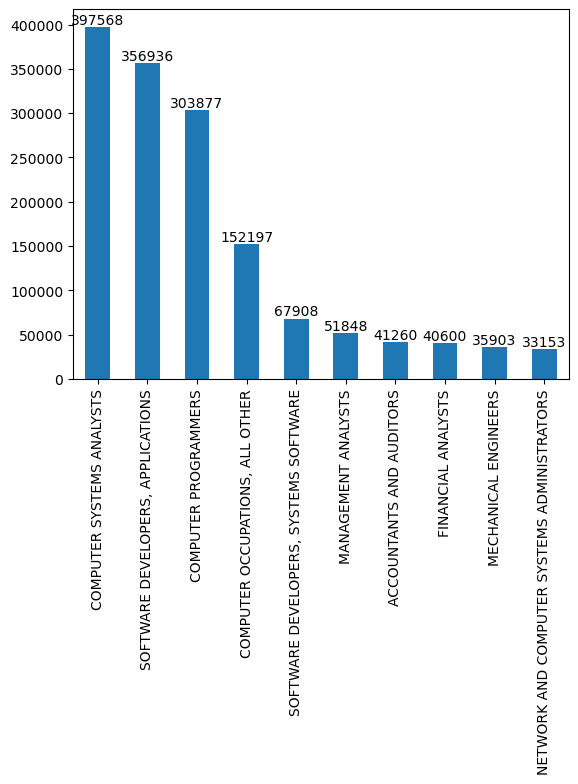

In [48]:
# number of applicants belonging to each Standard Occuaption Classification of the job from 2011 to 2017 (Top 10)
ax = data['soc_name'].value_counts().head(10).plot.bar()
for container in ax.containers:
    ax.bar_label(container)

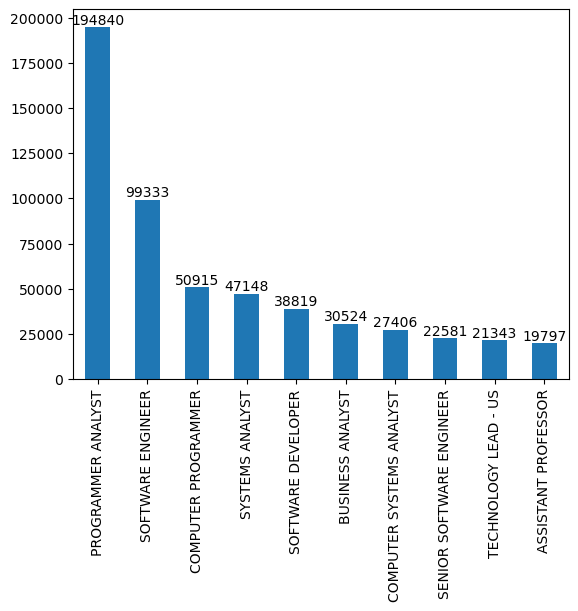

In [49]:
# Job titles of applicants from 2011 to 2017 (Top 10)
ax = data['job_title'].value_counts().head(10).plot.bar()
for container in ax.containers:
    ax.bar_label(container)

In [59]:
# convert minimum wages to same units (Yearly)

min_wages = pd.DataFrame(data['wage_from'].describe())
min_wages['wage_from'] = min_wages['wage_from'].astype('int64') 
min_wages

,wage_from
count,2352560
mean,82212
std,5628851
min,0
25%,60000
50%,70283
75%,90529
max,7278872788


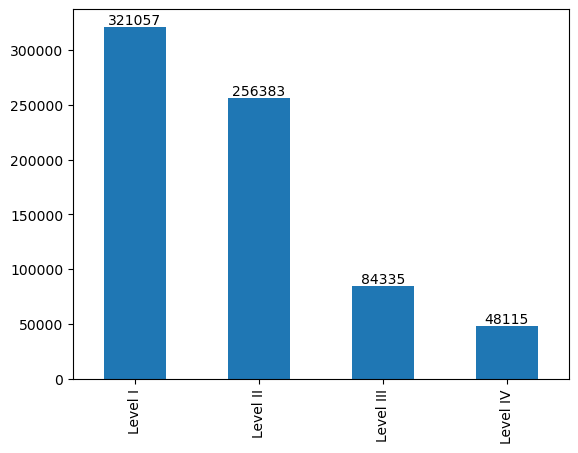

In [61]:
# Prevailing Wage level of applicants from 2011 to 2017 
ax = data['pw_level'].value_counts().head(10).plot.bar()
for container in ax.containers:
    ax.bar_label(container)

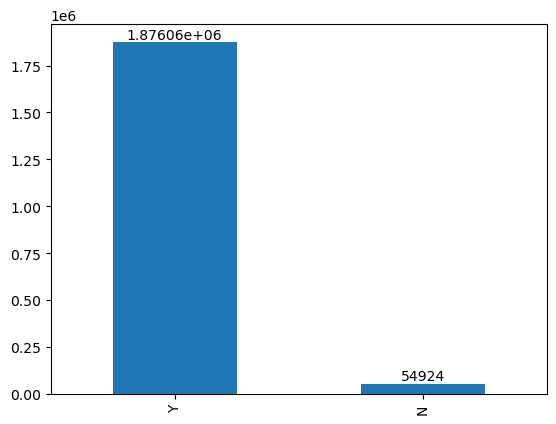

In [67]:
# Full-time position: whether the position is full time or not from 2011 to 2017 
ax = data['full_time_position'].value_counts().head(10).plot.bar()
for container in ax.containers:
    ax.bar_label(container)

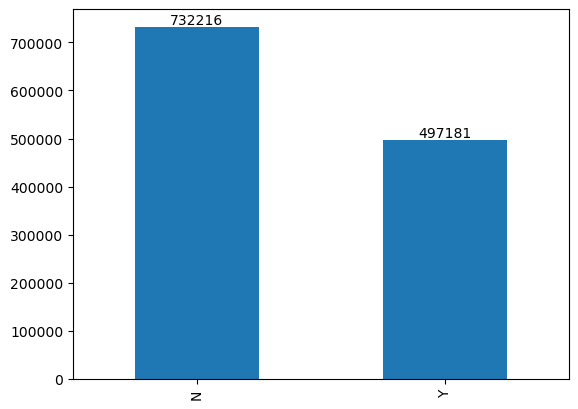

In [62]:
# emp_h1b_dependent: Whether the employer is H-1B dependent or not. from 2011 to 2017 
ax = data['emp_h1b_dependent'].value_counts().head(10).plot.bar()
for container in ax.containers:
    ax.bar_label(container)

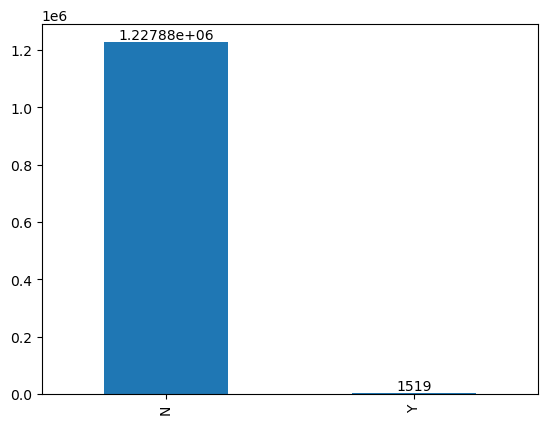

In [64]:
# emp_h1b_dependent: Whether the employer is H-1B dependent or not. from 2011 to 2017 
ax = data['emp_willful_violator'].value_counts().head(10).plot.bar()
for container in ax.containers:
    ax.bar_label(container)

References:     
https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972  
https://geopandas.org/en/stable/docs/user_guide/mapping.html

In [14]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

geometry = [Point(xy) for xy in zip(data.lng, data.lat)]

In [15]:
data['geometry'] = geometry
data.drop(['lng','lat'], axis = 1, inplace=True)

In [13]:
crs = {'init': 'epsg:4326'}
emp_loc = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)

C:\Users\mmurugesan3\Anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [16]:
usa_map = gpd.read_file('map/s_22mr22.shp')

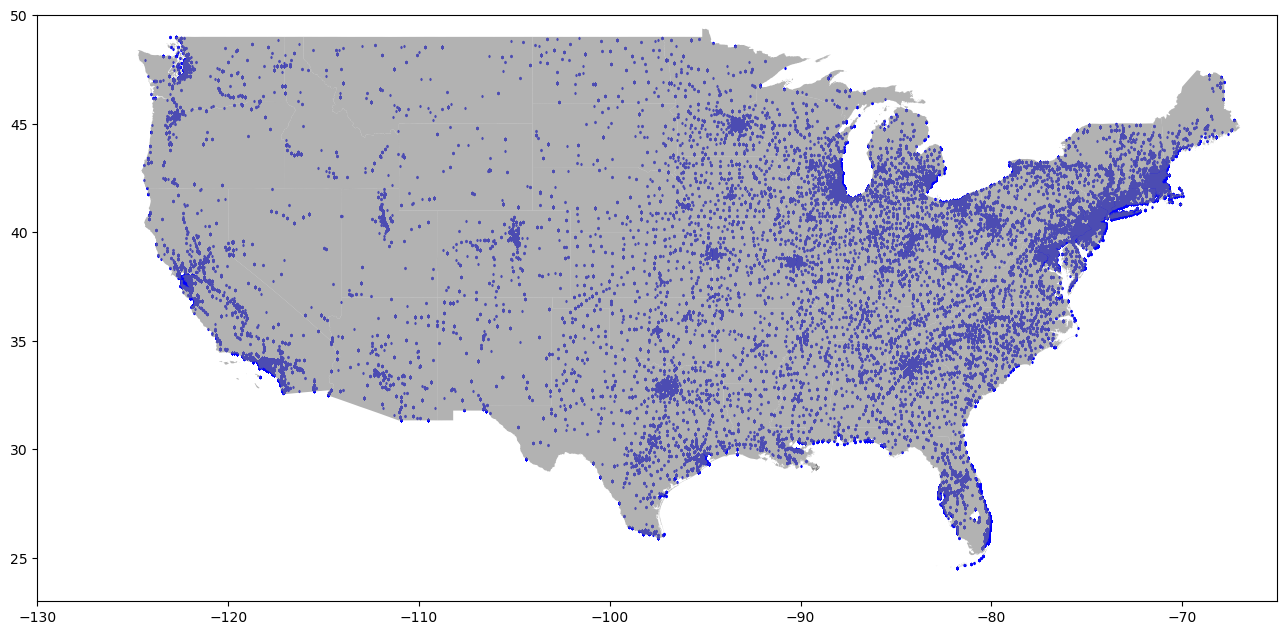

In [141]:
fig, ax = plt.subplots(figsize = (16,16))
ax.set_aspect('equal')
ax.set_xlim([-130,-65])
ax.set_ylim([23,50])
emp_loc.geometry.plot(marker='d', color='blue', markersize=1, ax=ax, label = 'Emp Loc')
gpd.read_file('map/s_22mr22.shp').plot(color='grey', ax=ax, alpha=0.6)
plt.show()

In [163]:
count_per_state = usa_map.set_index('STATE').join(data['emp_state'].value_counts())
count_per_state = count_per_state.reset_index()
count_per_state

,STATE,NAME,FIPS,LON,LAT,geometry,emp_state
0,AK,Alaska,02,-152.240980,64.240190,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",567.0
1,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",6473.0
2,AR,Arkansas,05,-92.439200,34.899770,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",7831.0
3,AS,American Samoa,60,-170.372150,-14.264860,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773...",NaN
4,AZ,Arizona,04,-111.664570,34.293230,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",16231.0
5,CA,California,06,-119.608180,37.245370,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",388666.0
6,CO,Colorado,08,-105.547830,38.998550,"POLYGON ((-106.87560 41.00301, -106.85850 41.0...",15768.0
7,CT,Connecticut,09,-72.726230,41.621960,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ...",26410.0
8,DC,District of Columbia,11,-77.014640,38.909320,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ...",9817.0
9,DE,Delaware,10,-75.505920,38.995590,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ...",9878.0


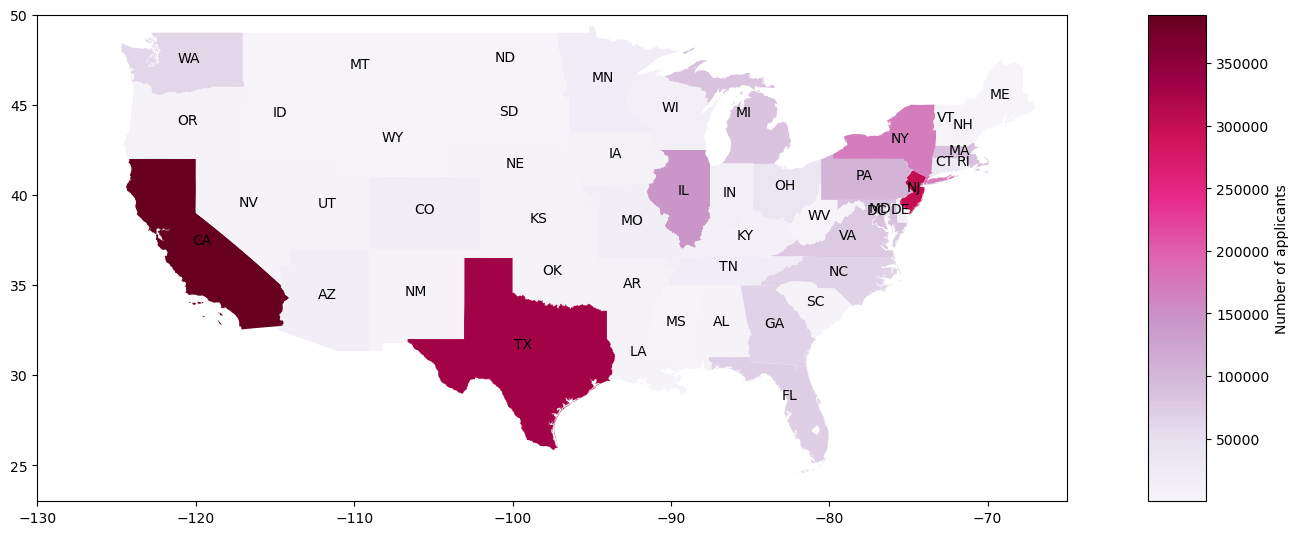

In [165]:
fig, ax = plt.subplots(figsize = (16,16))
ax.set_aspect('equal')
ax.set_xlim([-130,-65])
ax.set_ylim([23,50])
# size for legend
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

count_per_state.plot(column='emp_state', ax=ax,legend=True, cax=cax,
                    legend_kwds={'label': "Number of applicants"}, cmap='PuRd')
count_per_state.apply(lambda x: ax.annotate(text=x['STATE'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.show()

In [169]:
# explore the hypothesis about why the top employer city is not in the top employer state
state_city = pd.DataFrame(data[['emp_state','emp_city']].value_counts())

In [190]:
state_city.head(10)

,,0
emp_state,emp_city,
TX,PLANO,135568
NY,NEW YORK,122257
IL,CHICAGO,73105
MD,ROCKVILLE,55546
NJ,EDISON,53012
PA,PHILADELPHIA,49778
TX,HOUSTON,46493
NJ,EAST BRUNSWICK,37312
CA,SUNNYVALE,35819


In [198]:
state_city.loc["CA"].describe()

,0
count,1018.000000
mean,381.787819
std,2592.849920
min,1.000000
25%,1.000000
50%,4.000000
75%,32.000000
max,35819.000000


In [199]:
state_city.loc["TX"].describe()

,0
count,660.000000
mean,500.989394
std,5871.077661
min,1.000000
25%,1.000000
50%,4.000000
75%,17.000000
max,135568.000000


#### Plano, TX has the most number of employees applying compared to other cities. But overall, California has the highest number of employess applying. The reason for this because there are significantly higher number of employee cities in California compared to Texas even though one of its cities (Plano) has significantly higher employers. 

In [200]:
# minimmum wages units
data['wage_unit'].unique()

array(['Y', 'H', 'BW', 'M', 'W', nan], dtype=object)

In [201]:
# minimmum prevailing wages
data['pw_unit'].unique()

array(['Y', 'H', 'BW', 'M', 'W', nan], dtype=object)

We can see that there are different units for the 'prevailing_wage', 'wage_from' and 'wage_to' columns. Hence, we will make all the values uniform to the 'Hourly' unit. Lets assume 40 hours per week, 4 weeks per month, and 52 weeks per year to make the conversion.

In [226]:
unit_col = 'wage_unit'
for wage_col in ['wage_from','wage_to']:
    data.loc[data[unit_col]=='Y',wage_col] = data[data[unit_col]=='Y'][wage_col].apply(lambda x: x/(40*52))
    data.loc[data[unit_col]=='BW',wage_col] = data[data[unit_col]=='BW'][wage_col].apply(lambda x: x/(40*2))  
    data.loc[data[unit_col]=='M',wage_col] = data[data[unit_col]=='M'][wage_col].apply(lambda x: x/(40*4))
    data.loc[data[unit_col]=='W',wage_col] = data[data[unit_col]=='W'][wage_col].apply(lambda x: x/(40)) 
unit_col = 'pw_unit'
wage_col = 'prevailing_wage'
data.loc[data[unit_col]=='Y',wage_col] = data[data[unit_col]=='Y'][wage_col].apply(lambda x: x/(40*52))
data.loc[data[unit_col]=='BW',wage_col] = data[data[unit_col]=='BW'][wage_col].apply(lambda x: x/(40*2))  
data.loc[data[unit_col]=='M',wage_col] = data[data[unit_col]=='M'][wage_col].apply(lambda x: x/(40*4))
data.loc[data[unit_col]=='W',wage_col] = data[data[unit_col]=='W'][wage_col].apply(lambda x: x/(40))

In [228]:
data.isnull().sum()

case_year                     0
case_submitted                0
decision_date                 0
emp_name                     66
emp_city                     42
emp_state                    82
emp_zip                      69
emp_country             1185186
job_title                    20
soc_code                    113
soc_name                  11495
full_time_position       421587
prevailing_wage             117
pw_unit                     153
pw_level                1642677
wage_from                     7
wage_to                 1207119
wage_unit                    44
work_city                     0
work_state                    0
emp_h1b_dependent       1123170
emp_willful_violator    1123170
case_status                   0
geometry                      0
dtype: int64

# Problem Statement:

Lets consider a Law Firm called 'Immigrant Success' and its the period before 2019 when the lottery system did not exist. The firm wants to provide few key insights to their clients on maximizing the chances of H1-B being approved. 

To solve this, they want me (a Data Scientist) to use the historical data of H1-B cases and identify key factors. I decided to do some feature engineering and build a classification model to predict the results of H1-B cases based on the input features. I will also extraact important key features from this model.

**Columns not needed:**                     
case_year  
case_submitted  
decision_date  
emp_name  
emp_state (new feature)  
emp_city  
emp_zip                        
emp_country  
job_title  
soc_code  
pw_unit
pw_level
wage_to  
wage_unit  
work_city  
work_state (new feature)  
emp_h1b_dependent  
emp_willful_violator  
geometry (add lat, long instead)  

**New features:**
emp_state -> west, mid, east from lat, long / geometry  
soc_name -> catergories by department (correlated to skillful workers needed)  
work_state -> west, mid, east from lat, long / geometry  

In [77]:
input_data = pd.read_csv("h1b_data.csv")

C:\Users\mmurugesan3\AppData\Local\Temp\ipykernel_5816\2613493479.py:1: DtypeWarning: Columns (8,12,15,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  input_data = pd.read_csv("h1b_data.csv")


In [79]:
input_data.columns

Index(['case_year', 'case_status', 'case_submitted', 'decision_date',
       'emp_name', 'emp_city', 'emp_state', 'emp_zip', 'emp_country',
       'job_title', 'soc_code', 'soc_name', 'full_time_position',
       'prevailing_wage', 'pw_unit', 'pw_level', 'wage_from', 'wage_to',
       'wage_unit', 'work_city', 'work_state', 'emp_h1b_dependent',
       'emp_willful_violator', 'lat', 'lng'],
      dtype='object')

# I ran the model with data from all the years and got a very bad model performance: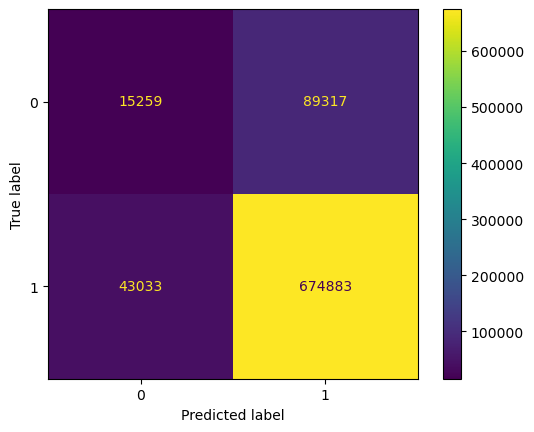

# This is a classic case of garbage-in and garbage-out example in Machine Learning. The reason for the bad performance is mostly due to the non-consistent data. By intuition we can also say that policies for H1-B keep changing each year and hence I decided to train the model only on the latest year - 2017. This will also give us insights on H1-B based on the latest policies.

In [80]:
input_data = input_data.loc[input_data['case_year']==2017]

In [81]:
columns_to_drop = [
'case_year',  
'case_submitted',  
'decision_date',  
'emp_name' ,  
'emp_city',  
'emp_zip',                        
'emp_country' , 
'job_title' , 
'soc_code' , 
'pw_level',
'wage_to',
'work_city', 
'emp_h1b_dependent',
'emp_willful_violator'  
]
input_data = input_data.drop(columns_to_drop, axis=1)

In [82]:
input_data = input_data.dropna(axis='index')

In [83]:
input_data.isnull().sum()

case_status           0
emp_state             0
soc_name              0
full_time_position    0
prevailing_wage       0
pw_unit               0
wage_from             0
wage_unit             0
work_state            0
lat                   0
lng                   0
dtype: int64

In [84]:
unit_col = 'wage_unit'
for wage_col in ['wage_from']:
    input_data.loc[input_data[unit_col]=='Y',wage_col] = input_data[input_data[unit_col]=='Y'][wage_col].apply(lambda x: x/(40*52))
    input_data.loc[input_data[unit_col]=='BW',wage_col] = input_data[input_data[unit_col]=='BW'][wage_col].apply(lambda x: x/(40*2))  
    input_data.loc[input_data[unit_col]=='M',wage_col] = input_data[input_data[unit_col]=='M'][wage_col].apply(lambda x: x/(40*4))
    input_data.loc[input_data[unit_col]=='W',wage_col] = input_data[input_data[unit_col]=='W'][wage_col].apply(lambda x: x/(40)) 
unit_col = 'pw_unit'
wage_col = 'prevailing_wage'
input_data.loc[input_data[unit_col]=='Y',wage_col] = input_data[input_data[unit_col]=='Y'][wage_col].apply(lambda x: x/(40*52))
input_data.loc[input_data[unit_col]=='BW',wage_col] = input_data[input_data[unit_col]=='BW'][wage_col].apply(lambda x: x/(40*2))  
input_data.loc[input_data[unit_col]=='M',wage_col] = input_data[input_data[unit_col]=='M'][wage_col].apply(lambda x: x/(40*4))
input_data.loc[input_data[unit_col]=='W',wage_col] = input_data[input_data[unit_col]=='W'][wage_col].apply(lambda x: x/(40))

In [85]:
columns_to_drop = [
'pw_unit' , 
'wage_unit' 
]
input_data = input_data.drop(columns_to_drop, axis=1)

In [86]:
X = input_data.drop("case_status", axis=1)
y = input_data["case_status"]

In [87]:
# split into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
X_train.isnull().sum()

emp_state             0
soc_name              0
full_time_position    0
prevailing_wage       0
wage_from             0
work_state            0
lat                   0
lng                   0
dtype: int64

In [89]:
X_train.shape

(405541, 8)

### Feature Engineering

#### 1. emp_state and work_state
Lets divide the states into 3 categories: west, mid, east based on their position in the USA, as the name suggests

In [90]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
usa_map = gpd.read_file('map/s_22mr22.shp')

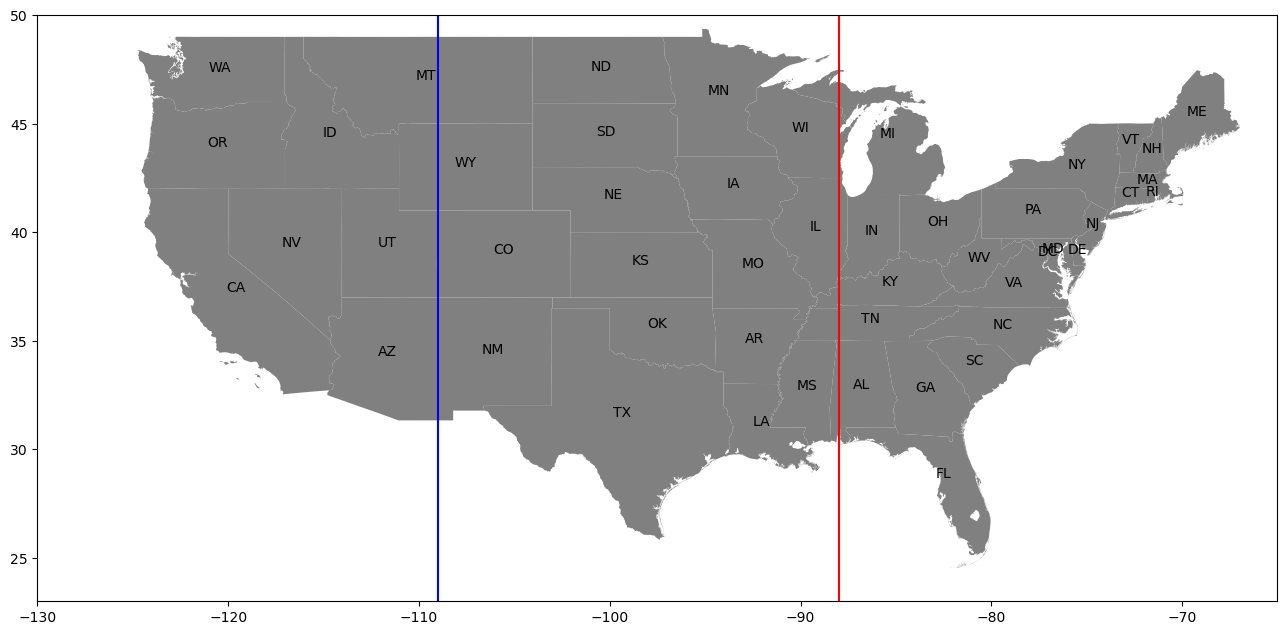

In [91]:
fig, ax = plt.subplots(figsize = (16,16))
ax.set_aspect('equal')
ax.set_xlim([-130,-65])
ax.set_ylim([23,50])
usa_map.plot(color='grey', ax=ax, alpha=1)
plt.axvline(x = -109, color = 'b')
plt.axvline(x = -88, color = 'r')
usa_map.apply(lambda x: ax.annotate(text=x['STATE'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.show()

In [92]:
def centx(x):
    centx = x.centroid.coords[0][0]
    return centx
def region(x):
    cerx = x
    cat = None
    if cerx>=-109:
        if cerx<=-88:
            cat = 'mid'
        else:
            cat = 'east'
    else:
        cat = 'west'
    return cat

usa_map['centroids'] = usa_map['geometry'].apply(centx)
usa_map['region'] = usa_map['centroids'].apply(region)
X_train['emp_region'] = pd.DataFrame(X_train['emp_state']).rename({'emp_state':'STATE'},axis=1).join(usa_map.set_index('STATE'), how='left', on='STATE')['region']
X_train['work_region'] = pd.DataFrame(X_train['work_state']).rename({'work_state':'STATE'},axis=1).join(usa_map.set_index('STATE'), how='left', on='STATE')['region']

In [93]:
pd.DataFrame(X_train['soc_name'].value_counts())

,soc_name
"SOFTWARE DEVELOPERS, APPLICATIONS",82476
COMPUTER SYSTEMS ANALYSTS,61945
COMPUTER PROGRAMMERS,43647
"COMPUTER OCCUPATIONS, ALL OTHER",34992
"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",12359
...,...
"SECONDARY SCHOOL TEACHERS, EXCEPT SPECIAL AND CAR",1
"SOFTWARE DEVLOPERS, APPLICATIONS",1
"COMPUTER OCUPATIONS, ALL OTHER",1
REMOTE SENSING SCIENTISTS AND TECHNOLOGISTS,1


Now, for the 'soc_name' column: The name of the Standard Occupational Classification for the job. This columns has nearly 1314 unique values and I want to cluster them to 7 categories:

    1. computer - Computer related jobs
    2. engineering - other engineering fields jobs other than computer
    3. medicine - Medicine related jobs
    4. law - law related jobs
    5. teaching - teaching related jobs
    6. research - advanced research related jobs
    7. nonstem - all other jobs apart from the above categories
    

In [94]:
X_train['soc_name'] = X_train['soc_name'].replace(regex={r'^.*TEACHER.*$':'teaching',
                                   r'^.*EDUCAT.*$':'teaching'})

In [95]:
X_train['soc_name'] = X_train['soc_name'].replace(regex={r'^.*RESEARCH.*$':'research',
                                   r'^.*SCIENTIST.*$':'research', 
                                   r'^.*BIOCHEMIST.*$':'research',
                                   r'^.*BIOPHY.*$':'research',
                                   r'^.*CHEMIST.*$':'research',
                                   r'^.*PATHOL.*$':'research',
                                   r'^.*STATIS.*$':'research'
                                    })

In [96]:
X_train['soc_name'] = X_train['soc_name'].replace(regex={r'^.*MEDICAL.*$':'medicine',
                                   r'^.*SURG.*$':'medicine',
                                   r'^.*DENTAL.*$':'medicine',
                                   r'^.*NURSE.*$':'medicine',
                                   r'^.*THERAP.*$':'medicine',
                                   r'^.*PHARMA.*$':'medicine',
                                   r'^.*PEDIAT.*$':'medicine',
                                   r'^.*PSYCHI.*$':'medicine',
                                   r'^.*OBSETRI.*$':'medicine',
                                   r'^.*GYNAC.*$':'medicine'
                                  })

In [97]:
X_train['soc_name'] = X_train['soc_name'].replace(regex={r'^.*LAW.*$':'law',
                                   r'^.*ATTORN.*$':'law'})

In [98]:
X_train['soc_name'] = X_train['soc_name'].replace(regex={r'^.*COMP.*$':'computer',
                                   r'^.*SOFT.*$':'computer', 
                                   r'^.*WEB.*$':'computer', 
                                   r'^.*DATABASE.*$':'computer'})

In [99]:
X_train['soc_name'] = X_train['soc_name'].replace(regex={r'^.*ENGI.*$':'engineering'})

In [100]:
def soc_nonstem(x):
    soc_names = ['computer','law','medicine','research','teaching','engineering']
    if x not in soc_names:
        return True
    else:
        return False
X_train.loc[X_train['soc_name'].apply(soc_nonstem),'soc_name'] = 'nonstem'

In [101]:
X_train.drop(['emp_state','work_state'], axis=1, inplace=True)

In [102]:
X_train['full_time_position'] = X_train['full_time_position'].replace({'Y':1, 'N':0})

In [103]:
X_train.dtypes

soc_name               object
full_time_position      int64
prevailing_wage       float64
wage_from             float64
lat                   float64
lng                   float64
emp_region             object
work_region            object
dtype: object

In [104]:
X_train.describe()

,full_time_position,prevailing_wage,wage_from,lat,lng
count,405541.000000,405541.000000,405541.000000,405541.000000,405541.000000
mean,0.979193,48.097503,51.557548,38.164008,-93.186421
std,0.142737,877.869230,953.047590,4.696161,18.321205
min,0.000000,0.000000,0.000000,17.746640,-164.523056
25%,1.000000,28.650000,31.250000,34.077510,-112.074037
50%,1.000000,34.510096,37.439904,38.969555,-87.650052
75%,1.000000,43.339904,48.076923,41.053430,-77.036366
max,1.000000,192962.000000,150000.000000,71.290556,-64.703198


We have different range for the numerical variables and hence we can scale them using StandardScaler of sklearn

In [105]:
#scaling the numerical values 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.loc[:,['prevailing_wage','wage_from','lat','lng']])
X_train.loc[:,['prevailing_wage','wage_from','lat','lng']] = scaler.transform(X_train.loc[:,['prevailing_wage','wage_from','lat','lng']])

In [106]:
X_train

,soc_name,full_time_position,prevailing_wage,wage_from,lat,lng,emp_region,work_region
387484,nonstem,1,-0.018178,-0.019472,0.380807,0.983705,east,east
36113,computer,1,0.005220,0.001178,-1.681558,-0.248709,west,mid
292536,computer,1,-0.025525,-0.018786,0.314902,0.485766,east,east
193579,nonstem,1,-0.017540,-0.019787,-0.705128,0.589067,east,east
204868,computer,1,-0.021208,-0.018786,0.825952,0.278728,mid,mid
...,...,...,...,...,...,...,...,...
110278,computer,1,-0.012506,-0.015150,-2.171597,0.566902,mid,east
259205,computer,1,-0.001957,-0.004886,0.857301,0.288083,mid,mid
365871,computer,1,-0.001694,0.016526,0.628938,1.079544,east,east
131943,computer,1,-0.017096,-0.019377,-1.145821,-0.197599,mid,mid


Lets convert the categorical variables using OneHoeEncoding

In [107]:
X_train_final = pd.get_dummies(X_train)

In [108]:
X_train_final

,full_time_position,prevailing_wage,wage_from,lat,lng,soc_name_computer,soc_name_engineering,soc_name_law,soc_name_medicine,soc_name_nonstem,soc_name_research,soc_name_teaching,emp_region_east,emp_region_mid,emp_region_west,work_region_east,work_region_mid,work_region_west
387484,1,-0.018178,-0.019472,0.380807,0.983705,0,0,0,0,1,0,0,1,0,0,1,0,0
36113,1,0.005220,0.001178,-1.681558,-0.248709,1,0,0,0,0,0,0,0,0,1,0,1,0
292536,1,-0.025525,-0.018786,0.314902,0.485766,1,0,0,0,0,0,0,1,0,0,1,0,0
193579,1,-0.017540,-0.019787,-0.705128,0.589067,0,0,0,0,1,0,0,1,0,0,1,0,0
204868,1,-0.021208,-0.018786,0.825952,0.278728,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110278,1,-0.012506,-0.015150,-2.171597,0.566902,1,0,0,0,0,0,0,0,1,0,1,0,0
259205,1,-0.001957,-0.004886,0.857301,0.288083,1,0,0,0,0,0,0,0,1,0,0,1,0
365871,1,-0.001694,0.016526,0.628938,1.079544,1,0,0,0,0,0,0,1,0,0,1,0,0
131943,1,-0.017096,-0.019377,-1.145821,-0.197599,1,0,0,0,0,0,0,0,1,0,0,1,0


In [109]:
y_train

387484     C
36113      C
292536     C
193579    CW
204868     C
          ..
110278     C
259205     C
365871     C
131943     W
121969     C
Name: case_status, Length: 405541, dtype: object

In [110]:
# Replace "C" as 1 and all others as 0 in the case_status column
y_train[y_train!='C'] = 0
y_train[y_train=='C'] = 1

In [111]:
y_train = y_train.astype('int')

### Ready the test data

In [112]:
def centx(x):
    centx = x.centroid.coords[0][0]
    return centx
def region(x):
    cerx = x
    cat = None
    if cerx>=-109:
        if cerx<=-88:
            cat = 'mid'
        else:
            cat = 'east'
    else:
        cat = 'west'
    return cat

usa_map['centroids'] = usa_map['geometry'].apply(centx)
usa_map['region'] = usa_map['centroids'].apply(region)
X_test['emp_region'] = pd.DataFrame(X_test['emp_state']).rename({'emp_state':'STATE'},axis=1).join(usa_map.set_index('STATE'), how='left', on='STATE')['region']
X_test['work_region'] = pd.DataFrame(X_test['work_state']).rename({'work_state':'STATE'},axis=1).join(usa_map.set_index('STATE'), how='left', on='STATE')['region']

X_test['soc_name'] = X_test['soc_name'].replace(regex={r'^.*TEACHER.*$':'teaching',
                                   r'^.*EDUCAT.*$':'teaching'})

X_test['soc_name'] = X_test['soc_name'].replace(regex={r'^.*RESEARCH.*$':'research',
                                   r'^.*SCIENTIST.*$':'research', 
                                   r'^.*BIOCHEMIST.*$':'research',
                                   r'^.*BIOPHY.*$':'research',
                                   r'^.*CHEMIST.*$':'research',
                                   r'^.*PATHOL.*$':'research',
                                   r'^.*STATIS.*$':'research'
                                    })
X_test['soc_name'] = X_test['soc_name'].replace(regex={r'^.*MEDICAL.*$':'medicine',
                                   r'^.*SURG.*$':'medicine',
                                   r'^.*DENTAL.*$':'medicine',
                                   r'^.*NURSE.*$':'medicine',
                                   r'^.*THERAP.*$':'medicine',
                                   r'^.*PHARMA.*$':'medicine',
                                   r'^.*PEDIAT.*$':'medicine',
                                   r'^.*PSYCHI.*$':'medicine',
                                   r'^.*OBSETRI.*$':'medicine',
                                   r'^.*GYNAC.*$':'medicine'
                                  })

X_test['soc_name'] = X_test['soc_name'].replace(regex={r'^.*LAW.*$':'law',
                                   r'^.*ATTORN.*$':'law'})

X_test['soc_name'] = X_test['soc_name'].replace(regex={r'^.*COMP.*$':'computer',
                                   r'^.*SOFT.*$':'computer', 
                                   r'^.*WEB.*$':'computer', 
                                   r'^.*DATABASE.*$':'computer'})

X_test['soc_name'] = X_test['soc_name'].replace(regex={r'^.*ENGI.*$':'engineering'})

def soc_nonstem(x):
    soc_names = ['computer','law','medicine','research','teaching','engineering']
    if x not in soc_names:
        return True
    else:
        return False
X_test.loc[X_test['soc_name'].apply(soc_nonstem),'soc_name'] = 'nonstem'

X_test.drop(['emp_state','work_state'], axis=1, inplace=True)

X_test['full_time_position'] = X_test['full_time_position'].replace({'Y':1, 'N':0})

X_test.loc[:,['prevailing_wage','wage_from','lat','lng']] = scaler.transform(X_test.loc[:,['prevailing_wage','wage_from','lat','lng']])

X_test_final = pd.get_dummies(X_test)

# Replace "C" as 1 and all others as 0 in the case_status column
y_test[y_test!='C'] = 0
y_test[y_test=='C'] = 1

y_test = y_test.astype('int')

# Classification model


### 1. Logistic regression

In [113]:
from sklearn.metrics import plot_confusion_matrix,classification_report, plot_roc_curve, roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

C:\Users\mmurugesan3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


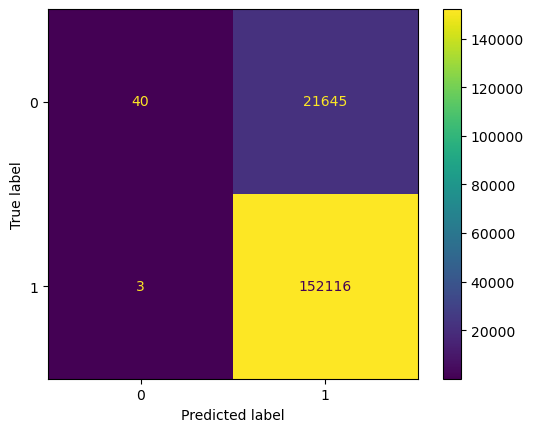

              precision    recall  f1-score   support

           0       0.93      0.00      0.00     21685
           1       0.88      1.00      0.93    152119

    accuracy                           0.88    173804
   macro avg       0.90      0.50      0.47    173804
weighted avg       0.88      0.88      0.82    173804



In [114]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()
lrc.fit(X_train_final,y_train)
y_pred_log=lrc.predict(X_test_final)
# print("Logistic Regression Accuracy ",lrc.score(X_test,y_test))
plot_confusion_matrix(lrc, X_test_final, y_test) 
plt.show()
print(classification_report(y_test, y_pred_log))

### LightGBM

C:\Users\mmurugesan3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


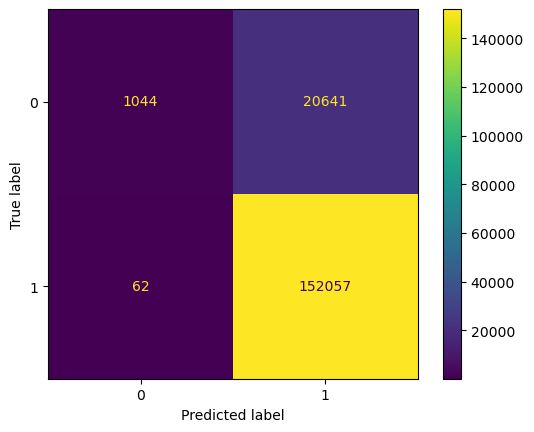

              precision    recall  f1-score   support

           0       0.94      0.05      0.09     21685
           1       0.88      1.00      0.94    152119

    accuracy                           0.88    173804
   macro avg       0.91      0.52      0.51    173804
weighted avg       0.89      0.88      0.83    173804



In [115]:
import lightgbm as lgb
lgbm_clf = lgb.LGBMClassifier(num_leaves=50,learning_rate=0.1)
lgbm_clf.fit(X_train_final, y_train)
y_pred_lgbm = lgbm_clf.predict(X_test_final)
plot_confusion_matrix(lgbm_clf, X_test_final, y_test) 
plt.show()
print(classification_report(y_test, y_pred_lgbm))

### Random Forest Classifier

C:\Users\mmurugesan3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


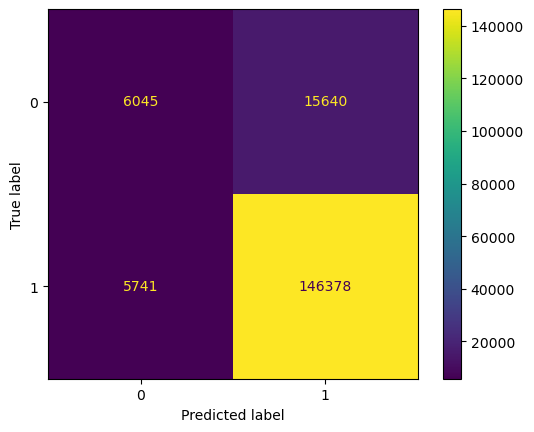

              precision    recall  f1-score   support

           0       0.51      0.28      0.36     21685
           1       0.90      0.96      0.93    152119

    accuracy                           0.88    173804
   macro avg       0.71      0.62      0.65    173804
weighted avg       0.85      0.88      0.86    173804



In [116]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train_final,y_train)
y_pred_rnd = rnd_clf.predict(X_test_final)
# print("Random Forest Score ",rnd_clf.score(X_test2,y_test2))
plot_confusion_matrix(rnd_clf, X_test_final, y_test) 
plt.show()
print(classification_report(y_test, y_pred_rnd))

1    354670
0     50871
Name: target, dtype: int64
(50871, 19)


C:\Users\mmurugesan3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


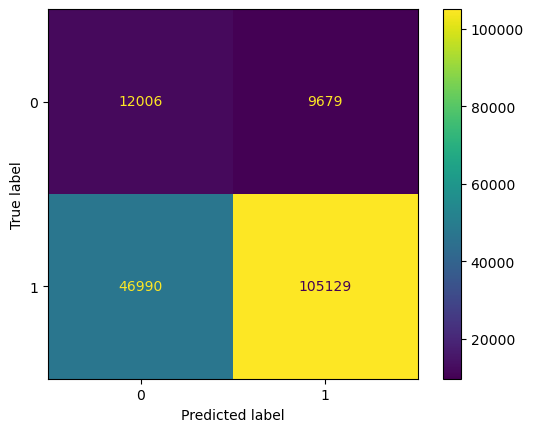

              precision    recall  f1-score   support

           0       0.20      0.55      0.30     21685
           1       0.92      0.69      0.79    152119

    accuracy                           0.67    173804
   macro avg       0.56      0.62      0.54    173804
weighted avg       0.83      0.67      0.73    173804



In [117]:
# Resampling to see if the model performance improves
temp = X_train_final.copy()
temp["target"] = y_train
print(temp["target"].value_counts())
class0 = temp[temp['target']==0]
class1 = temp[temp['target']==1]

# Downsampling
from sklearn.utils import resample
class1_downsample = resample(class1,
             replace=True,
             n_samples=len(class0),
             random_state=42)

print(class1_downsample.shape)
data_downsampled = pd.concat([class1_downsample, class0])
X_train_downs = data_downsampled.drop("target", axis=1)
y_train_downs = data_downsampled["target"]

lgbm_clf_d = lgb.LGBMClassifier(num_leaves=50,learning_rate=0.1)
lgbm_clf_d.fit(X_train_downs,y_train_downs)
y_pred_lgbm_clf_d=lgbm_clf_d.predict(X_test_final)
# print("AdaBoost Classifier ",adb_cls.score(X_test,y_test))
plot_confusion_matrix(lgbm_clf_d, X_test_final, y_test)  
plt.show()
print(classification_report(y_test, y_pred_lgbm_clf_d))

C:\Users\mmurugesan3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


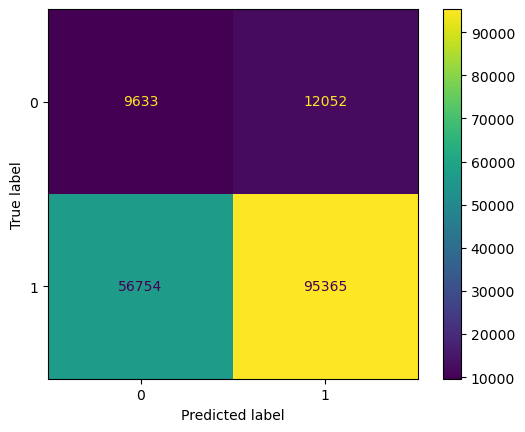

              precision    recall  f1-score   support

           0       0.15      0.44      0.22     21685
           1       0.89      0.63      0.73    152119

    accuracy                           0.60    173804
   macro avg       0.52      0.54      0.48    173804
weighted avg       0.80      0.60      0.67    173804



In [118]:
lrc=LogisticRegression()
lrc.fit(X_train_downs,y_train_downs)
y_pred_log=lrc.predict(X_test_final)
# print("Logistic Regression Accuracy ",lrc.score(X_test,y_test))
plot_confusion_matrix(lrc, X_test_final, y_test) 
plt.show()
print(classification_report(y_test, y_pred_log))

C:\Users\mmurugesan3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


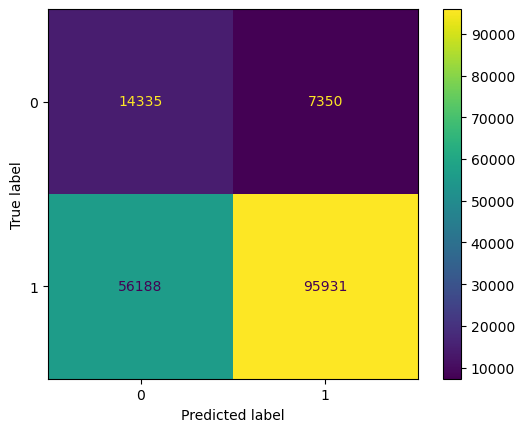

              precision    recall  f1-score   support

           0       0.20      0.66      0.31     21685
           1       0.93      0.63      0.75    152119

    accuracy                           0.63    173804
   macro avg       0.57      0.65      0.53    173804
weighted avg       0.84      0.63      0.70    173804



In [119]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train_downs,y_train_downs)
y_pred_rnd = rnd_clf.predict(X_test_final)
# print("Random Forest Score ",rnd_clf.score(X_test2,y_test2))
plot_confusion_matrix(rnd_clf, X_test_final, y_test) 
plt.show()
print(classification_report(y_test, y_pred_rnd))

Random forest classifier seems to perform well as there is clearly overfitting in the other models. Resampling by downsampling the class 1 to sample number as class 0 helped in improving the recall of class 0 but this can be because of the less number of class 1 after downsampling. Hence, I decided to go with random forest classfier without resampling as my final model.

# *FINAL MODEL*: Random Forest Classifier

C:\Users\mmurugesan3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


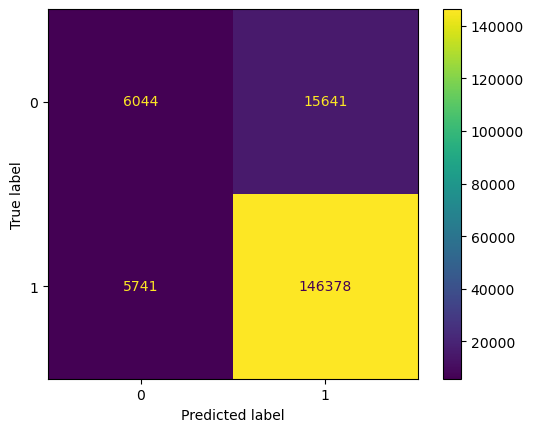

              precision    recall  f1-score   support

           0       0.51      0.28      0.36     21685
           1       0.90      0.96      0.93    152119

    accuracy                           0.88    173804
   macro avg       0.71      0.62      0.65    173804
weighted avg       0.85      0.88      0.86    173804



In [120]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train_final,y_train)
y_pred_rnd = rnd_clf.predict(X_test_final)
# print("Random Forest Score ",rnd_clf.score(X_test2,y_test2))
plot_confusion_matrix(rnd_clf, X_test_final, y_test) 
plt.show()
print(classification_report(y_test, y_pred_rnd))

# Identifying top features

As our final model is the random forest classifier, we can use the Gini importance score calculated in decision trees to compute the feature importance. This is already implemented in sklearn (mean decrease in impurity - MDI)  
Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

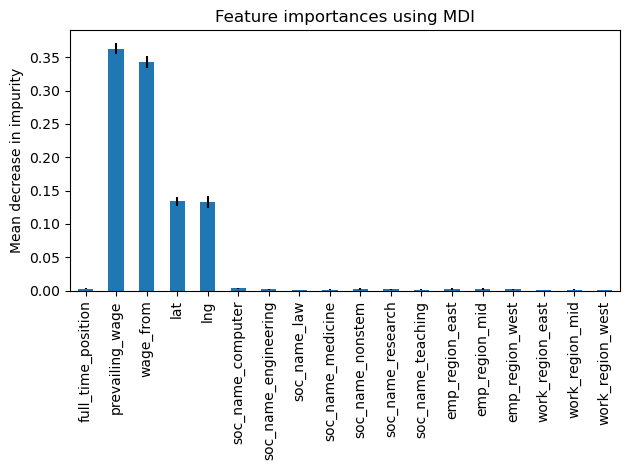

In [121]:
importances = rnd_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_], axis=0)
feature_names = list(X_train_final.columns)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<AxesSubplot:xlabel='0'>

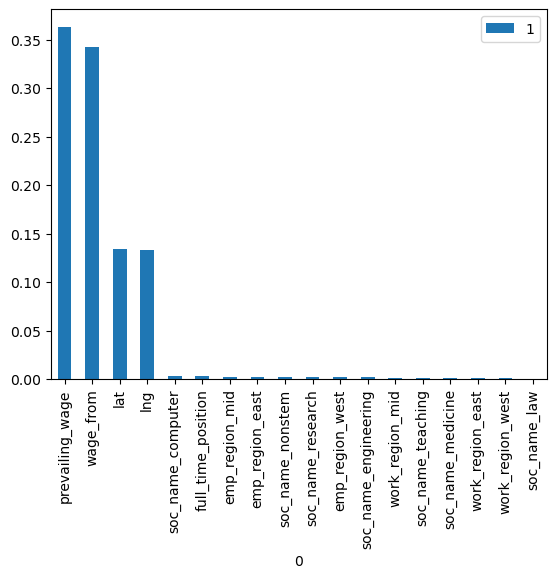

In [122]:
# sorting the features based on their importance
pd.DataFrame([feature_names,rnd_clf.feature_importances_]).T.set_index(0).sort_values(1,ascending=False).plot.bar()